<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-DataSet" data-toc-modified-id="Read-DataSet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read DataSet</a></span></li><li><span><a href="#Analise-Exploratória" data-toc-modified-id="Analise-Exploratória-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analise Exploratória</a></span></li></ul></div>

# Importando Lybrarys

In [29]:
import pandas as pd
import numpy as  np

#bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as  np

#preprocessamento
from sklearn import preprocessing

#imagens
from IPython.display import Image as img


#bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter

#Classificadores / Algoritmos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

#Validação Modelo
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')


## Read DataSet

In [30]:
df_cesaria = pd.read_excel ('cesarianadataset.xlsx')

In [31]:
df_cesaria.head()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


## Analise Exploratória

Text(0.5, 0.98, 'Distribuição da Idade')

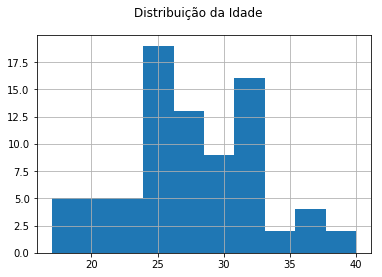

In [32]:
df_cesaria.idade.hist()
plt.suptitle('Distribuição da Idade')

In [33]:
df_cesaria.loc[df_cesaria.idade  <  12,'Faixa_idade'] = 'Crianca'
df_cesaria.loc[(df_cesaria.idade >= 12) & (df_cesaria.idade < 22),'Faixa_idade']  = 'Jovem'
df_cesaria.loc[(df_cesaria.idade >= 22) & (df_cesaria.idade < 31),'Faixa_idade']  = 'Adulto'
df_cesaria.loc[(df_cesaria.idade >= 31) & (df_cesaria.idade < 41),'Faixa_idade']  = 'Experiente'
df_cesaria.loc[df_cesaria.idade  >= 41 ,'Faixa_idade'] = 'Senior'


In [34]:
df_cesaria.loc[df_cesaria.tempo_parto  ==  0,'tempo_parto_desc'] = 'Pontual'
df_cesaria.loc[df_cesaria.tempo_parto  ==  1,'tempo_parto_desc'] = 'Prematuro'
df_cesaria.loc[df_cesaria.tempo_parto  ==  2,'tempo_parto_desc'] = 'Tardio'


In [35]:
df_cesaria.loc[df_cesaria.pressao_sangue  ==  0,'pressao_sangue_desc'] = 'Baixo'
df_cesaria.loc[df_cesaria.pressao_sangue  ==  1,'pressao_sangue_desc'] = 'Normal'
df_cesaria.loc[df_cesaria.pressao_sangue  ==  2,'pressao_sangue_desc'] = 'Alto'



In [36]:
df_cesaria.loc[df_cesaria.prblm_coracao  ==  0,'problema_coracao_desc'] = 'Apto'
df_cesaria.loc[df_cesaria.prblm_coracao  ==  1,'problema_coracao_desc'] = 'Inepto'

In [37]:
df_cesaria.loc[df_cesaria.Cesariana  ==  0,'Cesariana_desc'] = 'Não'
df_cesaria.loc[df_cesaria.Cesariana  ==  1,'Cesariana_desc'] = 'Sim'

In [38]:
df_cesaria

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana,Faixa_idade,tempo_parto_desc,pressao_sangue_desc,problema_coracao_desc,Cesariana_desc
0,22,1,0,2,0,0,Adulto,Pontual,Alto,Apto,Não
1,26,2,0,1,0,1,Adulto,Pontual,Normal,Apto,Sim
2,26,2,1,1,0,0,Adulto,Prematuro,Normal,Apto,Não
3,28,1,0,2,0,0,Adulto,Pontual,Alto,Apto,Não
4,22,2,0,1,0,1,Adulto,Pontual,Normal,Apto,Sim
5,26,1,1,0,0,0,Adulto,Prematuro,Baixo,Apto,Não
6,27,2,0,1,0,0,Adulto,Pontual,Normal,Apto,Não
7,32,3,0,1,0,1,Experiente,Pontual,Normal,Apto,Sim
8,28,2,0,1,0,0,Adulto,Pontual,Normal,Apto,Não
9,27,1,1,1,0,1,Adulto,Prematuro,Normal,Apto,Sim


In [39]:
from sklearn.model_selection import train_test_split
y = np.array(df_cesaria[["Cesariana_desc"]])
X = np.array(df_cesaria.drop(labels = ["Cesariana_desc",
                              "Cesariana",
                              "pressao_sangue_desc",
                              "tempo_parto_desc",
                              "Faixa_idade",
                                "problema_coracao_desc"
                              ],axis = 1)
            )


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Verificando Algoritmo RandomForestClassifier ##

In [40]:
classifier = RandomForestClassifier(random_state=100,criterion='gini',max_depth=3 )
    
classifier.fit(X_train, y_train)

print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

y_pred  = classifier.predict(X_test)

0.7678571428571429
0.7083333333333334


In [41]:
print(confusion_matrix(y_test,y_pred))

[[ 7  5]
 [ 2 10]]


In [42]:
y_test_array = np.squeeze(np.asarray(y_test))
data_matriz_confusao = {'y_Predicted': np.array(y_pred),
        'y_Actual':     y_test_array
        }
df_matriz_confusao = pd.DataFrame(data_matriz_confusao, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_matriz_confusao['y_Actual'], df_matriz_confusao['y_Predicted'], rownames=['Atual'], colnames=['Predito'])
confusion_matrix

Predito,Não,Sim
Atual,,
Não,7,5
Sim,2,10


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Não       0.78      0.58      0.67        12
         Sim       0.67      0.83      0.74        12

   micro avg       0.71      0.71      0.71        24
   macro avg       0.72      0.71      0.70        24
weighted avg       0.72      0.71      0.70        24



## Verificando o algorítimo KNN ##

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
data_matriz_confusao_knn = {'y_Predicted': np.array(knn_pred),
        'y_Actual':     y_test_array
        }

df_matriz_confusao_knn = pd.DataFrame(data_matriz_confusao_knn, columns=['y_Actual','y_Predicted'])
confusion_matrix_knn = pd.crosstab(df_matriz_confusao_knn['y_Actual'], df_matriz_confusao_knn['y_Predicted'], rownames=['Atual'], colnames=['Predito'])


print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.6964285714285714
0.7083333333333334


In [45]:
confusion_matrix_knn

Predito,Não,Sim
Atual,,
Não,8,4
Sim,3,9


In [46]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

         Não       0.73      0.67      0.70        12
         Sim       0.69      0.75      0.72        12

   micro avg       0.71      0.71      0.71        24
   macro avg       0.71      0.71      0.71        24
weighted avg       0.71      0.71      0.71        24



## Verificando AdaBoostClassifier ##

In [47]:
abc = AdaBoostClassifier()


In [48]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [49]:
abc_pred = abc.predict(X_test)
data_matriz_confusao_abc = {'y_Predicted': np.array(abc_pred),
        'y_Actual':     y_test_array
        }
df_matriz_confusao_abc = pd.DataFrame(data_matriz_confusao_abc, columns=['y_Actual','y_Predicted'])
confusion_matrix_abc = pd.crosstab(df_matriz_confusao_abc['y_Actual'], df_matriz_confusao_abc['y_Predicted'], rownames=['Atual'], colnames=['Predito'])

print(abc.score(X_train, y_train))
print(abc.score(X_test, y_test))

0.7678571428571429
0.5833333333333334


In [50]:
confusion_matrix_abc

Predito,Não,Sim
Atual,,
Não,8,4
Sim,6,6


In [51]:
print(classification_report(y_test,abc_pred))

              precision    recall  f1-score   support

         Não       0.57      0.67      0.62        12
         Sim       0.60      0.50      0.55        12

   micro avg       0.58      0.58      0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



## Verificando as correlações entre os atributos ##

In [52]:
df_cesaria[['idade','nr_parto', 'tempo_parto', 'pressao_sangue','prblm_coracao', 'Cesariana']].corr()

,idade,nr_parto,tempo_parto,pressao_sangue,prblm_coracao,Cesariana
idade,1.000000,0.427160,-0.021857,0.074448,0.250485,0.077966
nr_parto,0.427160,1.000000,-0.074017,0.134315,0.200267,0.144894
tempo_parto,-0.021857,-0.074017,1.000000,-0.087298,-0.003985,-0.166233
pressao_sangue,0.074448,0.134315,-0.087298,1.000000,0.036515,-0.035760
prblm_coracao,0.250485,0.200267,-0.003985,0.036515,1.000000,0.352557
Cesariana,0.077966,0.144894,-0.166233,-0.035760,0.352557,1.000000


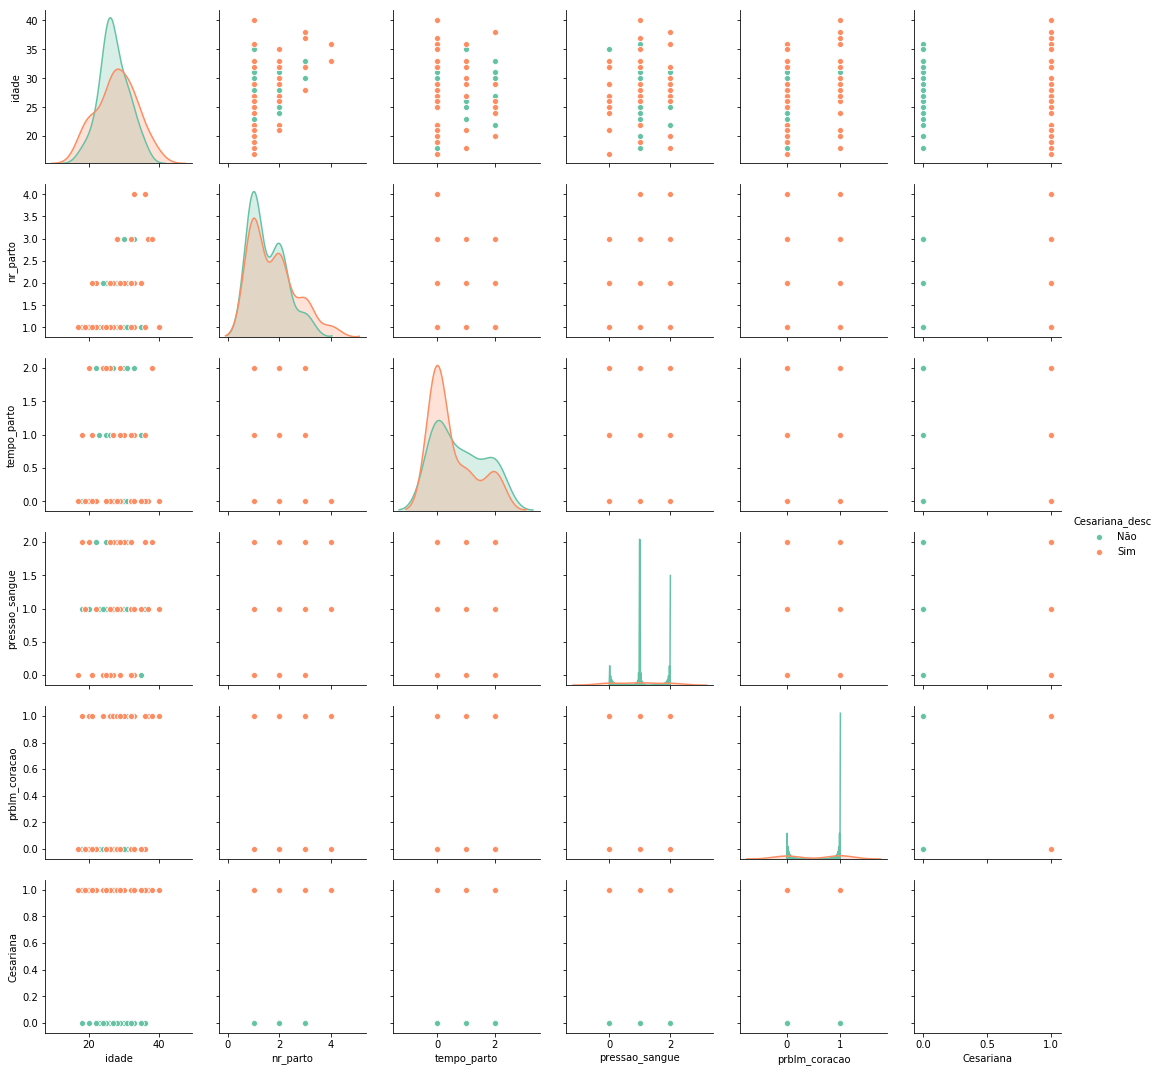

In [53]:
sns.pairplot(df_cesaria,hue="Cesariana_desc",palette="Set2")
plt.show()